## Unsupervised Anomaly Detection
```In this exercise you will use concepts you know, and maybe some concepts you are about to meet, in order to find anomalies in dataset of credit cards transactions.
We will think about this problem as one think of real anomaly detecting problems: your goal will be to choose the 1,000 most anomalous samples from the dataset - the samples you suspect to be the anomaly samples. In real life problems, those samples will be handed to a human researcher for verification. Obviously, if you give him a lot of regular samples, he will get angry.```

```~Ittai Haran```

In [31]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

```Load the dataset. You can see it's labeled: It's for allowing you to test yourself. Note that in real life problems, you won't have it. Normalize the dataset as you see fit.```

In [32]:
df = pd.read_csv('D:/creditcard.csv') ## can be found in: https://drive.google.com/open?id=1wyz2czVFaQWdqRmLAtT5MwCOSlnZ6od9
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


In [35]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [34]:
##target ratio
df['Class'].value_counts()[1]/len(df)

0.001727485630620034

In [36]:
from sklearn.metrics import roc_auc_score
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN

In [37]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


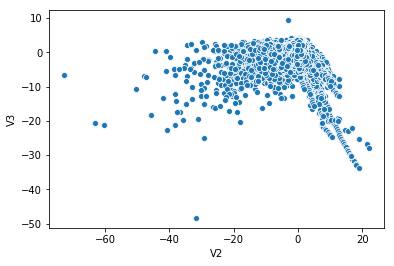

In [38]:
sns.scatterplot(x=df['V2'], y=df['V3'])

In [6]:
#labels[:1000]

In [7]:
#labels = DBSCAN(min_samples = 10, eps=2.5, n_jobs = -1).fit_predict(df.drop('Class' , axis=1))

In [8]:
#labels[:100]

In [9]:
#df['cluster'] = labels

In [10]:
#df[df['cluster']==-1]['Class'].value_counts()[1] / len(df[df['cluster']==-1])

In [11]:
#len(df[df['Class']==1]) / len(df)

In [12]:
# df[['Class' , 'V1']].corr()['Class']['V1']

In [39]:
# roc_auc_score_dict = {}
# corr_to_target = {}
# for col in df.columns:
#     roc_auc_score_dict[col] = roc_auc_score(df['Class'],df[col])
#     corr_to_target[col] = df[['Class' , col]].corr()['Class'][col]

In [14]:
df_roc_auc_scores = pd.DataFrame.from_dict(roc_auc_score_dict , orient='index').sort_values(by=0 , ascending=False)

In [15]:
df_corr_to_target = pd.DataFrame.from_dict(corr_to_target , orient='index')

In [16]:
combine = df_roc_auc_scores.join(df_corr_to_target, rsuffix='corr')

In [17]:
combine.drop('Class' , axis=0 , inplace=True)

In [18]:
#df.apply(lambda x: x[col] for col in df.columns , axis=1)
combine[combine.index=='V11']

,0,0corr
V11,0.918083,0.154876


In [19]:
combine = combine.T

In [20]:
combine

,V4,V11,V2,V21,V27,V8,V19,V20,V28,V26,...,V6,V1,V17,V7,V9,V16,V3,V10,V12,V14
0,0.938258,0.918083,0.854955,0.746375,0.696805,0.657842,0.656731,0.649972,0.641929,0.537999,...,0.232995,0.205094,0.191805,0.164188,0.15591,0.152869,0.0879272,0.0859427,0.0629596,0.0508403
0corr,0.133447,0.154876,0.0912887,0.0404134,0.0175797,0.0198751,0.034783,0.0200903,0.00953604,0.0044554,...,-0.0436432,-0.101347,-0.326481,-0.187257,-0.0977327,-0.196539,-0.192961,-0.216883,-0.260593,-0.302544


In [21]:
def calculate_row_grade(row , df_scores):
    sum_grade = 0
    for i in range(len(df_scores)):
        sum_grade = sum_grade + row[df_scores.columns[i]]*df_scores[df_scores.columns[i]][0]
        sum_grade = sum_grade * abs(df_scores[df_scores.columns[i]][1] *100000 )
        return sum_grade

In [22]:
df['grade'] = df.apply(lambda x: calculate_row_grade(x,combine) , axis=1)

```Your first task is to formulate a method for evaluating your anomalies. Write an evaluation method, which will help you compare between different ways to detect anomalies. Notice that this isn't a classification method, and regard your true goal: to mark the 1,000 most anomalous samples.```

In [23]:
def evaluate_method(y_true, grades):
    # y_true is the class: 0 for regular, 1 for anomaly
    # the grades should indicate how anomalous you think the sample is - as higher the grade, the sample is more suspiciuos
    
    # suggestion: sklearn.metrics.roc_auc_score(y_true, grades) -> read about it!
    # but you are encouraged to create something of your own.
    
    roc_auc = roc_auc_score(y_true,grades)
    corr = y_true.corr(grades)
    print('roc_auc score for evalue: ' , roc_auc)
    print('correlation between grade and target: ' , corr)
    
    print('the % of target among all the data ->',df['Class'].value_counts()[1] / len(df) )
    print('the % of target among the 1000 most suspiciuos ->', df.nlargest(1000 , 'grade')['Class'].value_counts()[1]/1000)
    return roc_auc

In [24]:
evaluate_method(df['Class'],df['grade'])

roc_auc score for evalue:  0.9382584071343061
correlation between grade and target:  0.13344748623900718
the % of target among all the data -> 0.001727485630620034
the % of target among the 1000 most suspiciuos -> 0.212


0.9382584071343061

In [25]:
df['Class'].value_counts()[1] / len(df)

0.001727485630620034

In [26]:
#df.sort_values(by='grade', ascending=False)
df.nlargest(1000 , 'grade')['Class'].value_counts()[1]/1000

0.212

```We can now examine different methods for anomaly detecting. For each method, evaluate it, and compare it to the other methods.```

```The first one we will try is to grade the samples by their distance from the 'mean sample', in units of standard deviation. You can also think about the features as independent gaussian distributions and grade a sample by its distance from the gaussian's mean, for every feature.```

```What hidden assumption you took during "training"? what part of the data you trained on?```

```Try using PCA: project the dataset into a lower dimensional space, and than use the "inverse" transformation (why ""?) to get approximated samples. Compare the samples you got to the samples you started with.```

```Read about one class SVM. Use it to evaluate your samples. Notice that this algorithm is very slow compared to those you tried earlier. Consider training it only on a fraction of the samples.
Hint: you can use the decision function directly to get the distance of the sample from the decision boundary.```

```Now try clustering your data, and use the distance from the clusters (you will have to define it) to grade the samples. Think about changing your normalization method when trying to cluster. Here you also might want to consider to train on a fraction of the samples.```

```Try combining the grades you got from different methods into a single grade. Did you get a better detector? why or why not?```

```Now we will experience with Deep Auto Encoders. The idea is to create a neural network that gets the samples as input, and try to predict the very same samples: The difficulty comes from the fact that the networks gets narrower, and so having an information bottleneck. The grade each sample will get is the reconstruction error - the difference between the output and the input. You can read more about Auto Encoders in the literature.
(If you want to know more about Auto Encoders, read also about about Variational Auto Encoder)```

In [ ]:
from keras.layers import Dense, Input
from keras.models import Model

## Bonus

```Try thinking about other methods to detect anomalies in your data, and find a way to get better results.```